In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('Time-Wasters on Social Media.csv')

In [ ]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [ ]:
column_drop = ['UserID', 'Video ID', 'Watch Time']

In [ ]:
df = df.drop(columns=column_drop)

In [ ]:
label_encoders  = {}

for column in df.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

In [ ]:
df['Debt'] =  df['Debt'].astype(int)
df['Owns Property'] = df['Owns Property'].astype(int)

In [ ]:
X = df.drop('Addiction Level', axis=1)
y = df['Addiction Level']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
result = {}

In [ ]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True)
  result[name] = {
      'Accuracy': accuracy,
      'Precision': np.mean([report[str(i)]['precision'] for i in set (y)]),
      'Recall': np.mean([report[str(i)]['recall'] for i in set (y)]),
      'F1-Score': np.mean([report[str(i)]['f1-score'] for i in set (y)])
  }

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
result_df = pd.DataFrame(result).T
print("\nModel Performence Compairison\n")
result_df


Model Performence Compairison



,Accuracy,Precision,Recall,F1-Score
Random Forest,0.995,0.996711,0.996212,0.996410
SVM,0.840,0.546748,0.588384,0.563595
KNN,0.550,0.452150,0.370368,0.351791
Decision Tree,0.995,0.997024,0.996212,0.996571
Naive Bayes,0.995,0.997024,0.996212,0.996571


In [ ]:
best_model = result_df['Accuracy'].idxmax()
print(f"Best Model: {best_model}")

Best Model: Random Forest


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

<ipython-input-58-096dcd19dfb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_df.index, y="Accuracy", data=result_df, palette="Blues_d")


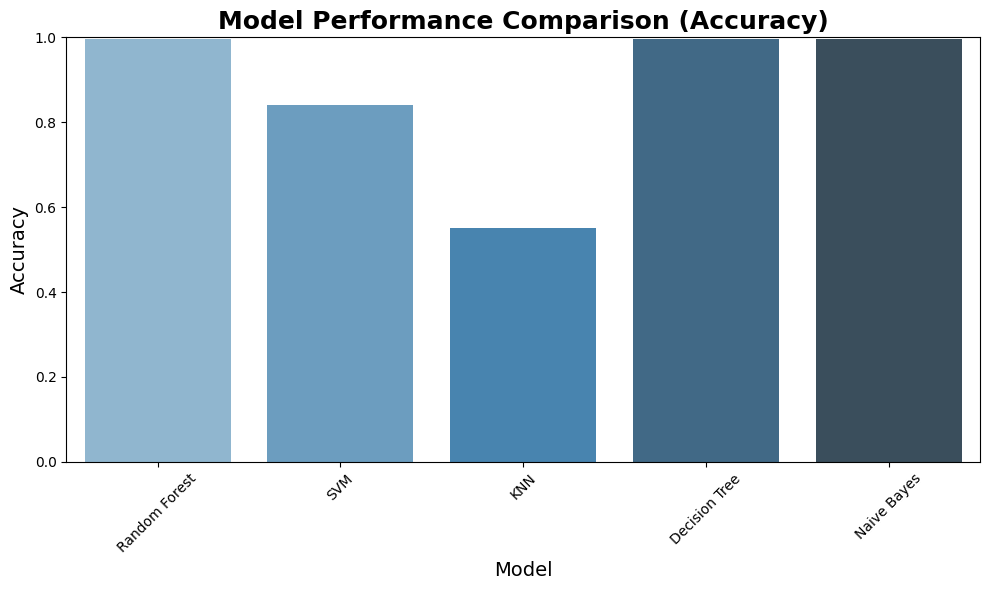

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=result_df.index, y="Accuracy", data=result_df, palette="Blues_d")
plt.title('Model Performance Comparison (Accuracy)', fontsize=18, weight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

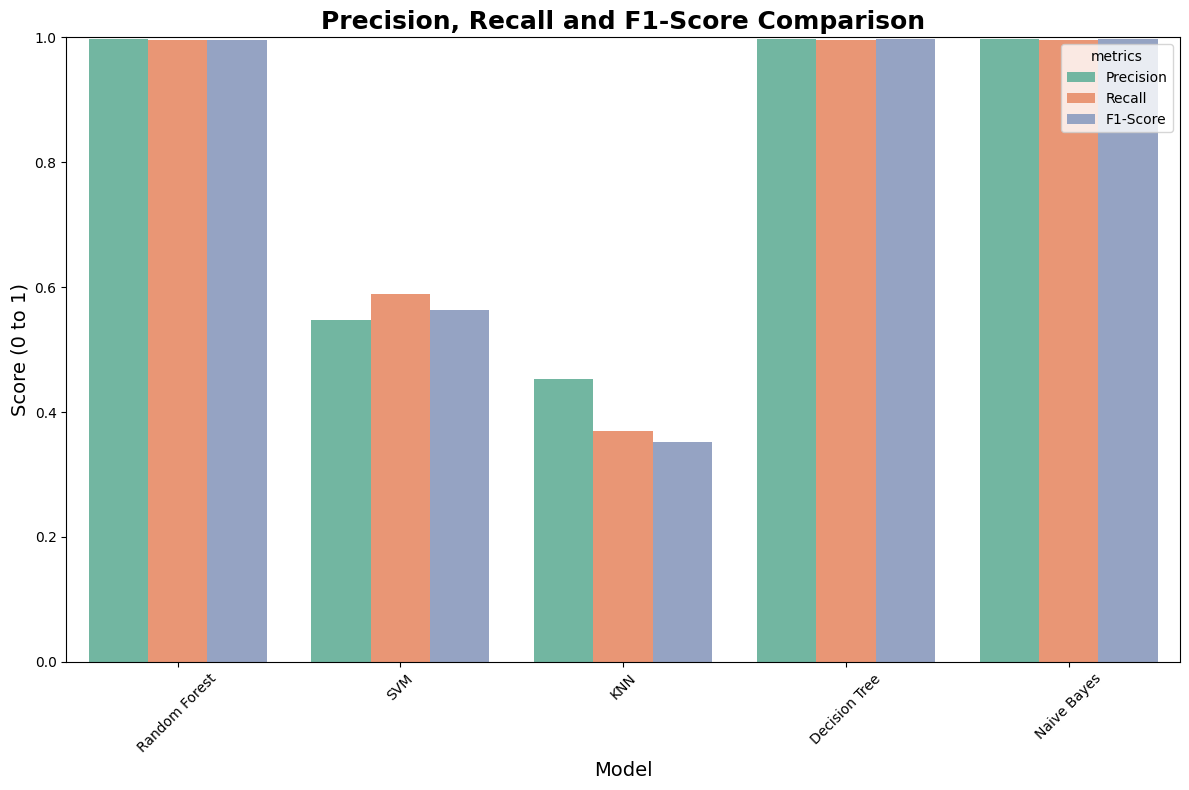

In [ ]:
plt.figure(figsize=(12,8))
result_melt = result_df.reset_index().melt(id_vars='index', value_vars=['Precision', 'Recall', 'F1-Score'])
sns.barplot(x="index", y="value", hue="variable", data=result_melt, palette="Set2")
plt.title('Precision, Recall and F1-Score Comparison', fontsize=18, weight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score (0 to 1)', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='metrics', loc='upper right')
plt.tight_layout()
plt.show()

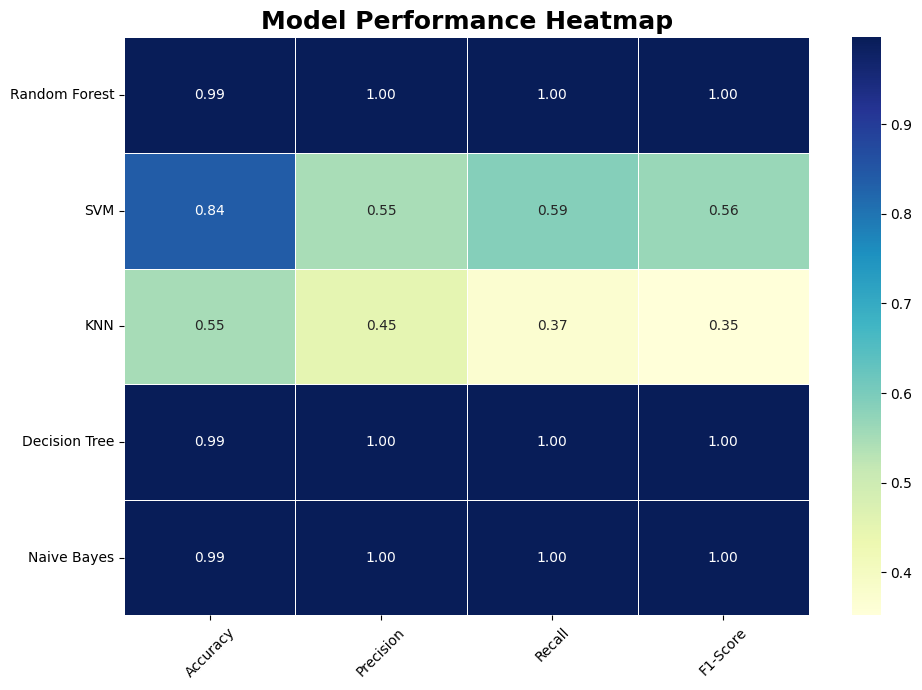

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(result_df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Model Performance Heatmap', fontsize=18, weight='bold')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


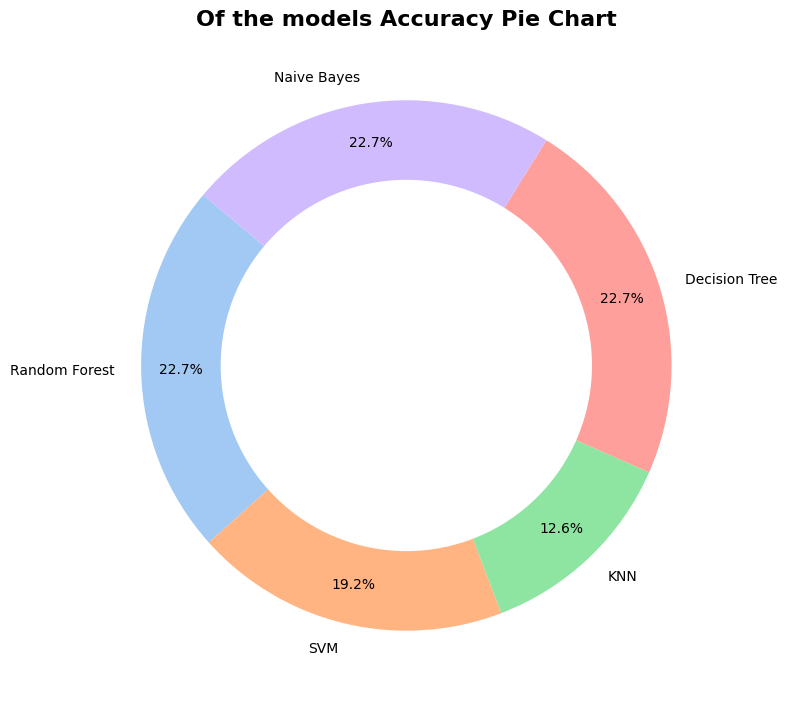

In [ ]:
import matplotlib.pyplot as plt

# 🎨 Pie Chart of Model Accuracy
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')

plt.pie(result_df['Accuracy'], labels=result_df.index, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Draw circle for Donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Of the models Accuracy Pie Chart', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# Now predictions with new data

# New input data
new_data = {
    'Age': 27,
    'Gender': 'Male',
    'Country': 'Bangladesh',
    'Salary': 75410,
    'Debt': False,
    'Owns Property': True,
    'Occupation': 'Engineer',
    'Region': 'Suburban',
    'Social Media': 'Instagram',
    'Usage Frequency': 3,
    'Usage Duration': 8,
    'Activity': 'Procrastination',
    'Device': 'Smartphone',
    'OS': 'Android',
    'Time of Usage': '9:00 PM',
    'Mobile Data': 6,
    'Wi-Fi': 5,
    'Commuting': 'Mobile Data'
}

# Encoding of new data
new_data_encoded = {}

# Use the correct dictionary name 'new_data' instead of 'new_data_2'
for column, value in new_data.items():
    if column in label_encoders:
        # Applying label encoding
        new_data_encoded[column] = label_encoders[column].transform([value])[0]
    else:
        new_data_encoded[column] = value

# Converting new data into a dataframe
new_data_df = pd.DataFrame([new_data_encoded], columns=X.columns)

# To scale the new data
new_data_scaled = scaler.transform(new_data_df)

# Making predictions with the best model
best_model_instance = models[best_model]
predicted_value = best_model_instance.predict(new_data_scaled)

# Showing predictions
print(f"\nPredicted value for the new data: {predicted_value}")

# Evaluating the model on the training set
y_pred_train = best_model_instance.predict(X_train)
print("\nClassification Report for the Training Set:")
print(classification_report(y_train, y_pred_train))



Predicted value for the new data: [2]

Classification Report for the Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00       207
           3       1.00      1.00      1.00       126
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00       181
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        37

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

